<a href="https://colab.research.google.com/github/josgiv/TugasKhususSEA_JosiaGiven/blob/main/Visualisasi_Data_(PDS)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import gdown

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns #Seaborn
from vega_datasets import data

# Define the Google Drive file ID and URL
file_id = '1mjCKL_Fl8OIwM6BvXhZk0xGkWjGegTcV'
url = f'https://drive.google.com/uc?id={file_id}'

output_file = 'brain_stroke.csv'

gdown.download(url, output_file, quiet=False)

df = pd.read_csv(output_file)


Downloading...
From: https://drive.google.com/uc?id=1mjCKL_Fl8OIwM6BvXhZk0xGkWjGegTcV
To: /content/brain_stroke.csv
100%|██████████| 285k/285k [00:00<00:00, 59.0MB/s]


In [13]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [14]:
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:

pd.set_option("display.max_rows", 100)
print(df)


      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

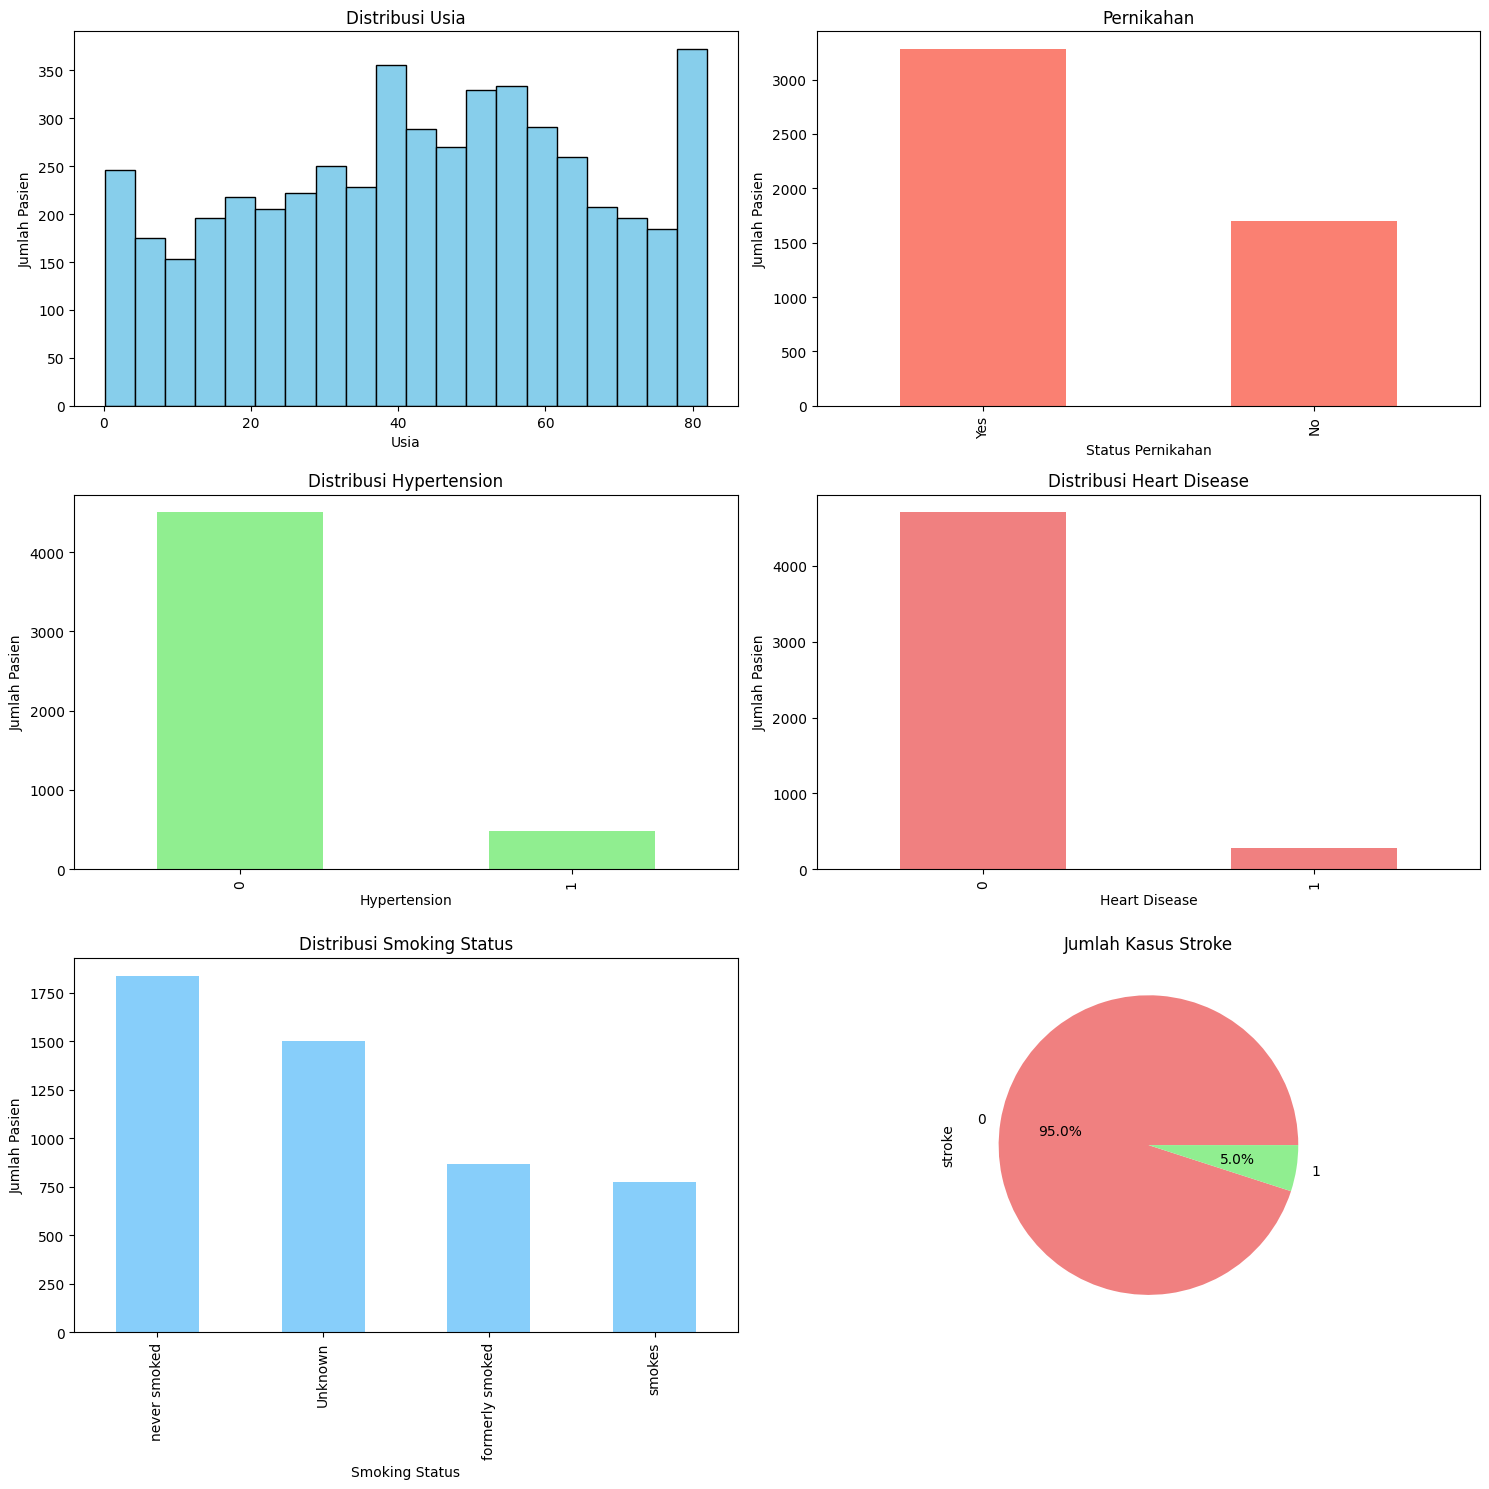

In [17]:
fig = plt.figure(figsize=(5, 2))  # Set the overall figure size

# 1 Distribusi Usia
plt.subplot(3, 2, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')

#  Status Pernikahan
plt.subplot(3, 2, 2)
df['ever_married'].value_counts().plot(kind='bar', color='salmon')
plt.title('Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Pasien')

#  3 (Tekanan Darah Tinggi)
plt.subplot(3, 2, 3)
df['hypertension'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribusi Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Jumlah Pasien')

#  4(Penyakit Jantung)
plt.subplot(3, 2, 4)
df['heart_disease'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribusi Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Jumlah Pasien')

# 5 (Status Merokok)
plt.subplot(3, 2, 5)
df['smoking_status'].value_counts().plot(kind='bar', color='lightskyblue')
plt.title('Distribusi Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Jumlah Pasien')

# 6 (Stroke)
plt.subplot(3, 2, 6)
df['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], figsize=(15, 15))  # Set the figsize for the pie chart
plt.title('Jumlah Kasus Stroke')

plt.tight_layout()
plt.show()

               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000  


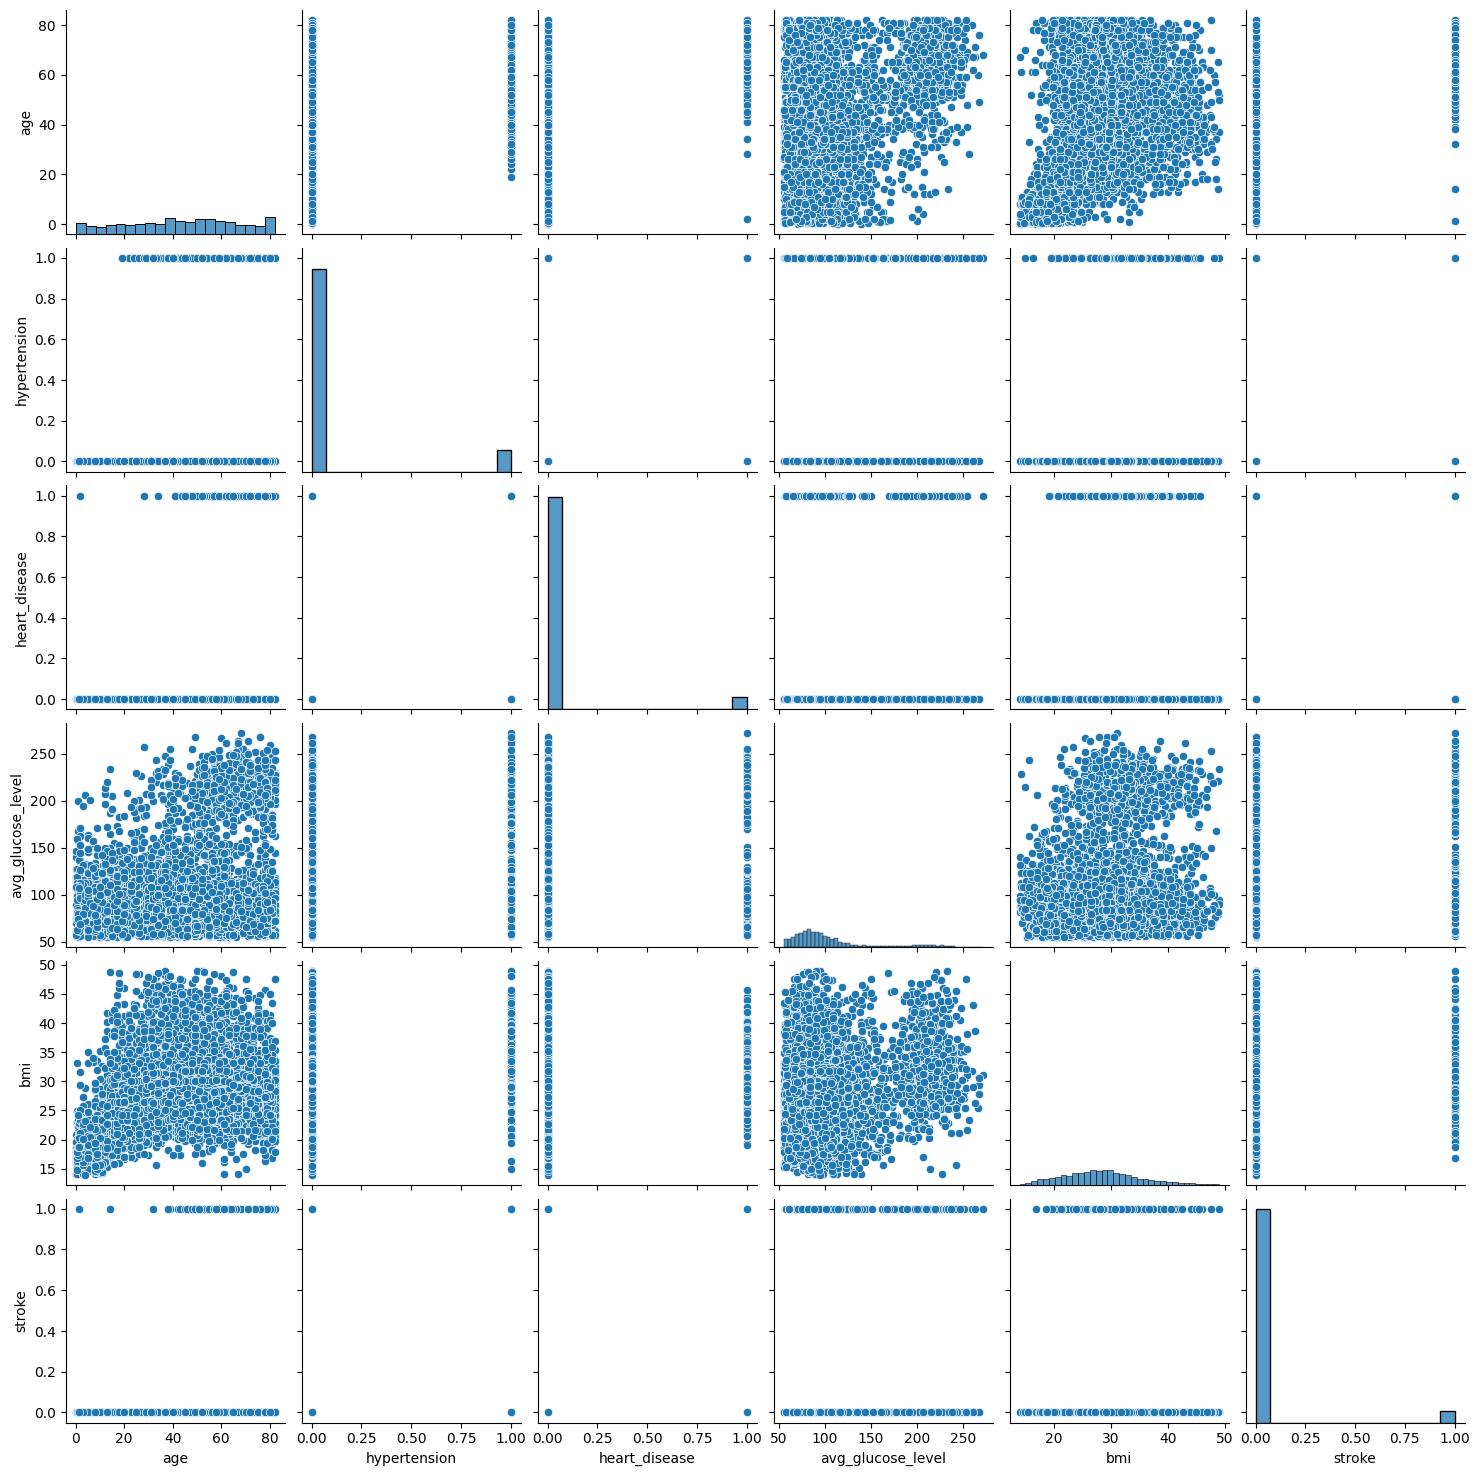

In [18]:
df = pd.read_csv('/content/brain_stroke.csv')

selected_columns = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]

summary = selected_columns.describe()
print(summary)
sns.pairplot(selected_columns)
plt.show()

<ipython-input-19-7bee3f08b0e6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_columns.corr()


                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.278120       0.264852           0.236763   
hypertension       0.278120      1.000000       0.111974           0.170028   
heart_disease      0.264852      0.111974       1.000000           0.166847   
avg_glucose_level  0.236763      0.170028       0.166847           1.000000   
bmi                0.373703      0.158762       0.060926           0.186348   
stroke             0.246478      0.131965       0.134610           0.133227   

                        bmi    stroke  
age                0.373703  0.246478  
hypertension       0.158762  0.131965  
heart_disease      0.060926  0.134610  
avg_glucose_level  0.186348  0.133227  
bmi                1.000000  0.056926  
stroke             0.056926  1.000000  


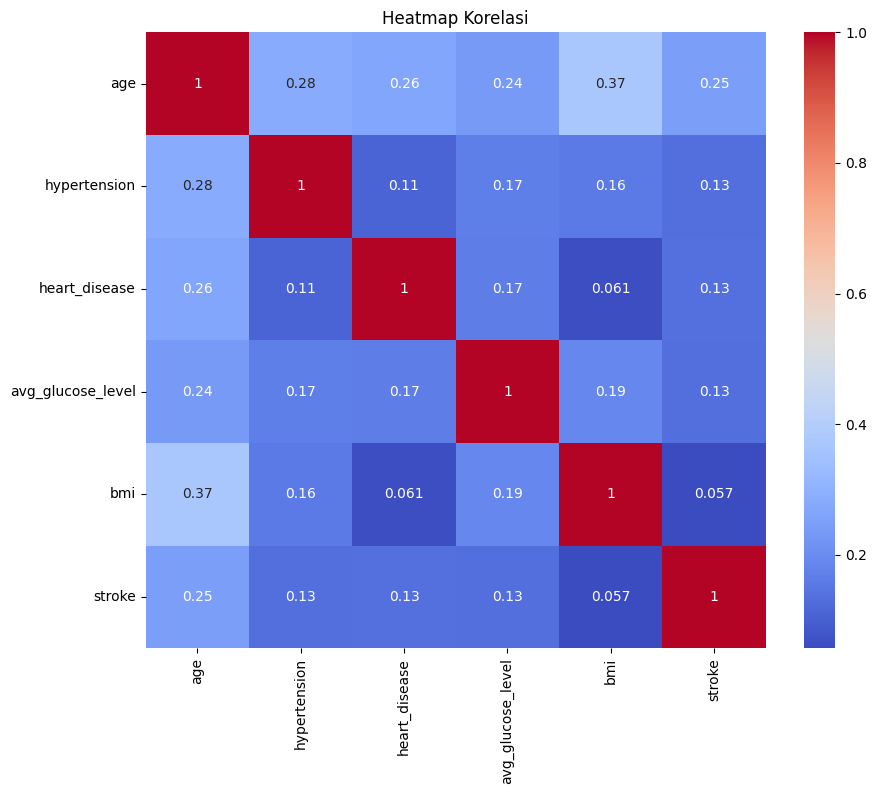

In [19]:
selected_columns = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]

corr_matrix = selected_columns.corr()

print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


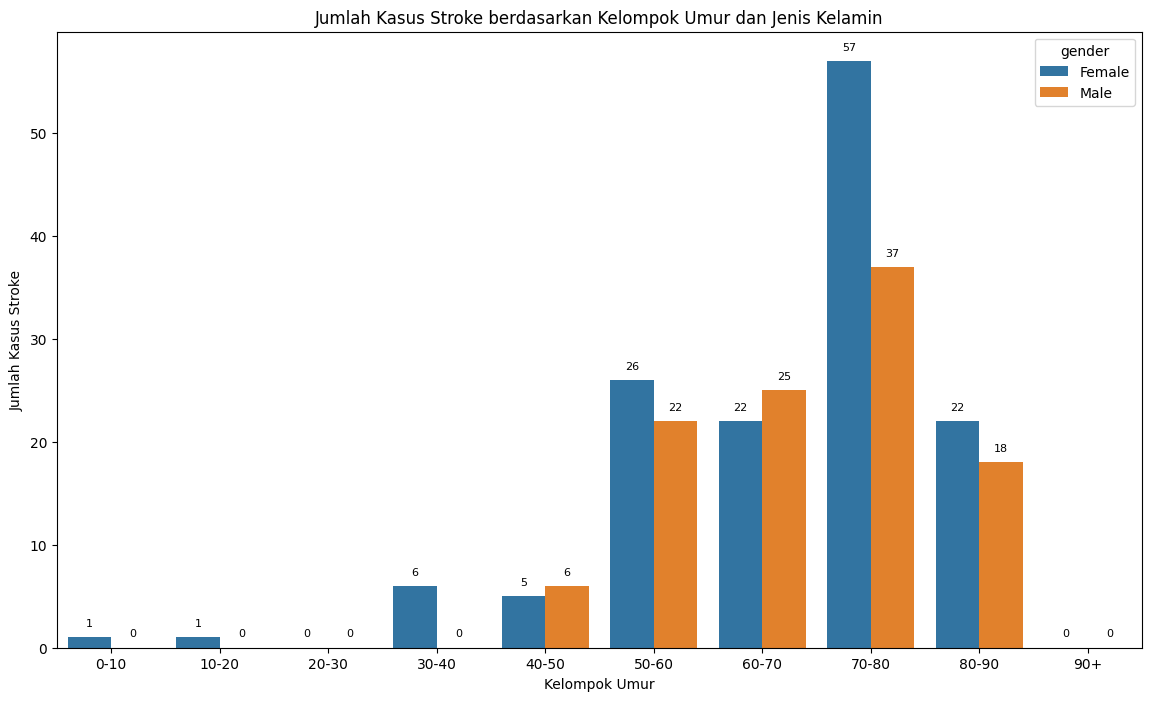

In [20]:
df = pd.read_csv('/content/brain_stroke.csv')

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

data_for_bar_chart = df.groupby(['gender', 'age_group', 'stroke']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='age_group', y='count', hue='gender', data=data_for_bar_chart[data_for_bar_chart['stroke'] == 1])

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Jumlah Kasus Stroke berdasarkan Kelompok Umur dan Jenis Kelamin')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Kasus Stroke')
plt.show()


<ipython-input-21-7d17596ae8bb>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='hypertension', y='count', hue='gender', data=data_for_bar_chart, ci=None, palette=palette_colors)


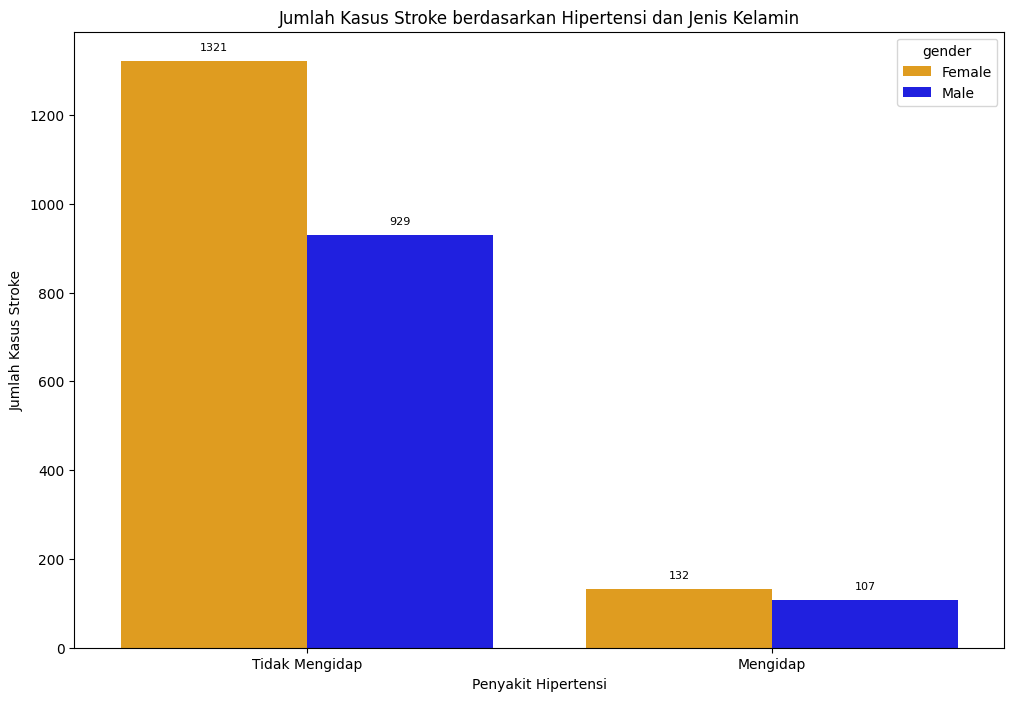

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/brain_stroke.csv')

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

data_for_bar_chart = df.groupby(['gender', 'hypertension', 'stroke']).size().reset_index(name='count')

data_for_bar_chart['hypertension'] = data_for_bar_chart['hypertension'].map({0: 'Tidak Mengidap', 1: 'Mengidap'})

# Menentukan palet warna untuk jenis kelamin
palette_colors = {'Male': 'blue', 'Female': 'orange'}

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='hypertension', y='count', hue='gender', data=data_for_bar_chart, ci=None, palette=palette_colors)

# Menambahkan label jumlah pasti di atas setiap batang
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Jumlah Kasus Stroke berdasarkan Hipertensi dan Jenis Kelamin')
plt.xlabel('Penyakit Hipertensi')
plt.ylabel('Jumlah Kasus Stroke')
plt.show()


<ipython-input-27-b663de36a799>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='bmi_group', y='count', hue='gender', data=data_for_bar_chart, ci=None, palette=palette_colors)


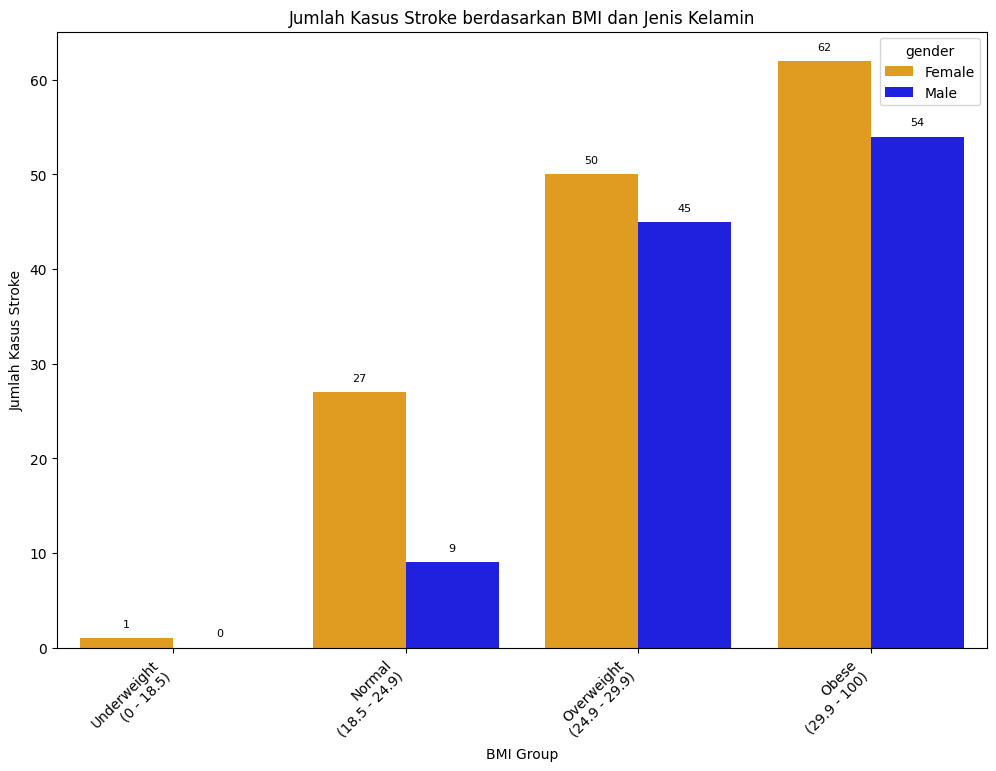

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/brain_stroke.csv')

# Menambahkan kolom 'bmi_group' berdasarkan range BMI
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Memfilter hanya pasien yang mengalami stroke
df_stroke = df[df['stroke'] == 1]

# Menyiapkan data untuk chart batang
data_for_bar_chart = df_stroke.groupby(['gender', 'bmi_group']).size().reset_index(name='count')

# Menentukan palet warna untuk jenis kelamin
palette_colors = {'Male': 'blue', 'Female': 'orange'}

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='bmi_group', y='count', hue='gender', data=data_for_bar_chart, ci=None, palette=palette_colors)

# Menambahkan label jumlah pasti di atas setiap batang
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Menambahkan label rentang BMI di bawah setiap grup BMI
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels([f"{label}\n({bin_range[0]} - {bin_range[1]})" for label, bin_range in zip(labels, zip(bins[:-1], bins[1:]))])

plt.title('Jumlah Kasus Stroke berdasarkan BMI dan Jenis Kelamin')
plt.xlabel('BMI Group')
plt.ylabel('Jumlah Pasien Menderita Stroke')

plt.show()


<ipython-input-28-812c33cca55f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='work_type', y='count', data=data_for_bar_chart, ci=None, palette='viridis')


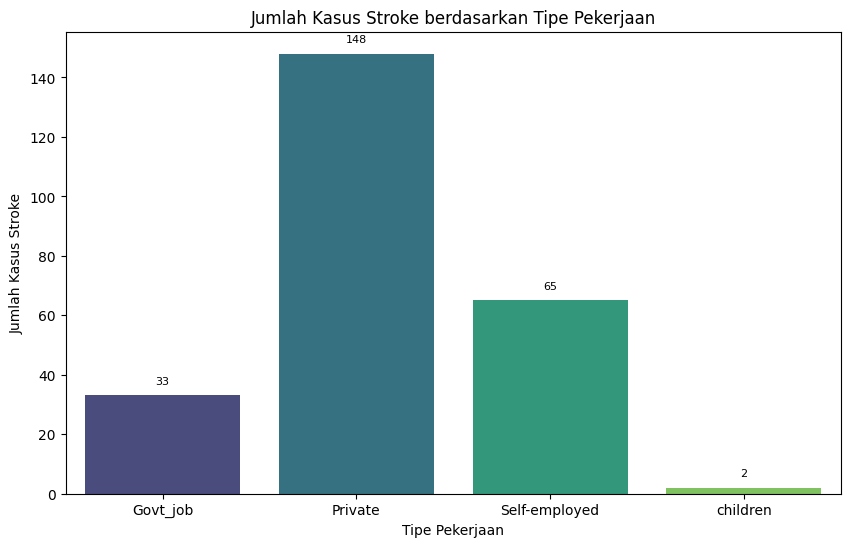

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/brain_stroke.csv')

# Memfilter hanya pasien yang mengalami stroke
df_stroke = df[df['stroke'] == 1]

# Menyiapkan data untuk chart batang
data_for_bar_chart = df_stroke.groupby(['work_type']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='work_type', y='count', data=data_for_bar_chart, ci=None, palette='viridis')

# Menambahkan label jumlah pasti di atas setiap batang
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Jumlah Kasus Stroke berdasarkan Tipe Pekerjaan')
plt.xlabel('Tipe Pekerjaan')
plt.ylabel('Jumlah Kasus Stroke')

plt.show()


<ipython-input-31-f293238c921e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Residence_type', y='count', hue='gender', data=data_for_bar_chart, ci=None, palette='pastel')


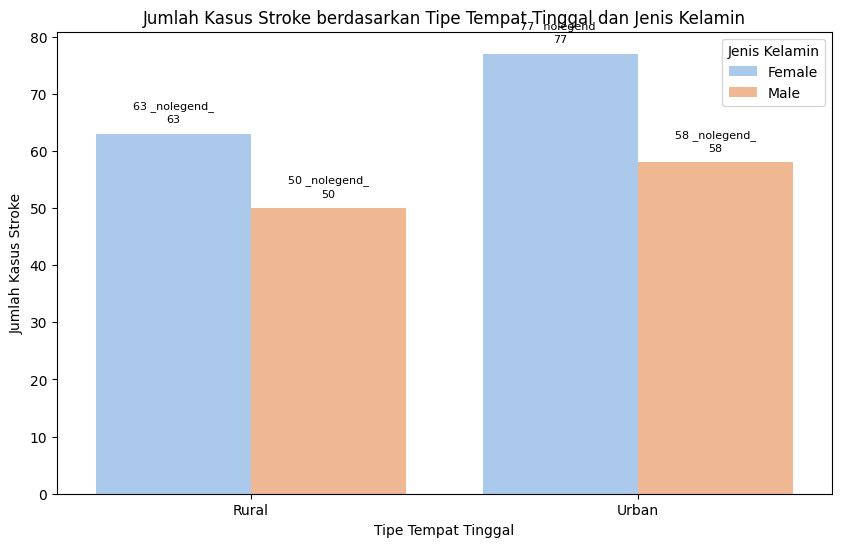

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/brain_stroke.csv')

# Memfilter hanya pasien yang mengalami stroke
df_stroke = df[df['stroke'] == 1]

# Menyiapkan data untuk chart batang
data_for_bar_chart = df_stroke.groupby(['Residence_type', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Residence_type', y='count', hue='gender', data=data_for_bar_chart, ci=None, palette='pastel')

# Menambahkan label jumlah pasti di atas setiap batang
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Menambahkan label jenis kelamin di atas setiap batang
for p in barplot.patches:
    height = p.get_height() if not np.isnan(p.get_height()) else 0
    barplot.annotate(f'{int(height)} {p.get_label()}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=8, color='black')

plt.title('Jumlah Kasus Stroke berdasarkan Tipe Tempat Tinggal dan Jenis Kelamin')
plt.xlabel('Tipe Tempat Tinggal')
plt.ylabel('Jumlah Kasus Stroke')
plt.legend(title='Jenis Kelamin', loc='upper right')

plt.show()
